In [714]:
import numpy as np
import scipy.stats
import pandas as pd

In [715]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display 
from ipywidgets import interact, widgets

%matplotlib inline

In [716]:
import re
import mailbox
import csv

In [717]:
china1965=pd.read_csv('income-1965-china.csv')
china2015=pd.read_csv('income-2015-china.csv')
usa1965=pd.read_csv('income-1965-usa.csv')
china2015=pd.read_csv('income-2015-china.csv')


In [718]:
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


In [719]:
china1965.var(ddof=0)

income          0.208846
log10_income    0.088610
dtype: float64

In [720]:
china1965.quantile([0.25,0.75])

,income,log10_income
0.25,0.344130,-0.463277
0.75,0.863695,-0.063640


In [721]:
scipy.stats.percentileofscore(china1965.income,1.5)

95.5

In [730]:
gapminder=pd.read_csv('gapminder.csv')
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


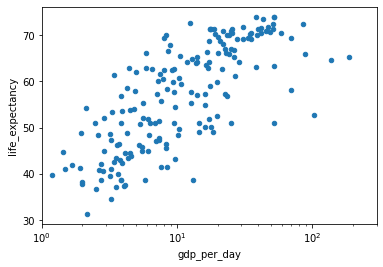

In [723]:
def plotyear(year):
    data=gapminder[gapminder.year == year]
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True)
    plt.xlim(1,500)
    
plotyear(1965)

In [724]:
max(gapminder.gdp_per_day)

500.1177275838466

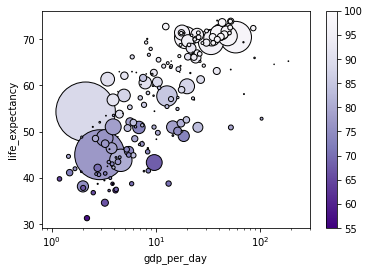

In [725]:
def plotyear(year):
    data=gapminder[gapminder.year==year].sort_values('population',ascending=False)
    area=5e-6* data.population
    color=data.age5_surviving
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                     s=area,c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'),vmin=55,vmax=100,
                      linewidths=1,edgecolors='k',sharex=False)
    plt.xlim(0.8,300)

plotyear(1965)

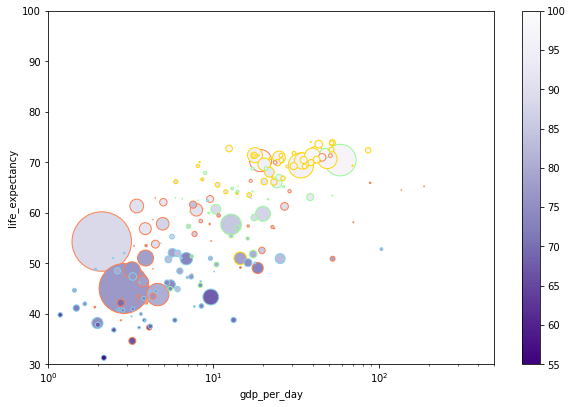

In [726]:
def plotyear(year):
    data=gapminder[gapminder.year==year].sort_values('population',ascending=False)
    area=5e-6* data.population
    color=data.age5_surviving
    edgecolor=data.region.map({'Africa':'skyblue','Europe':'gold','America':'palegreen','Asia':'coral'})
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                     s=area,c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'),vmin=55,vmax=100,
                      linewidths=1,edgecolors=edgecolor,sharex=False,
                     figsize=(10,6.5))
    plt.xlim(1,500)
    plt.ylim(30,100)

plotyear(1965)

In [727]:
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>